**This example demonstrates**


\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

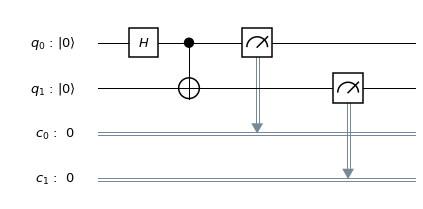

In [1]:
import os
import sys
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ

def my_func(str):
    print("In my_func,message is ", str)

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools

IBMQ.load_accounts()

## Define a two-qubit quantum circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

## Apply the quantum gates
circuit.h(q[0])
circuit.cx(q[0], q[1])

## Finish off with the measurements
circuit.measure(q, c)

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

In my_func,message is  in example_1


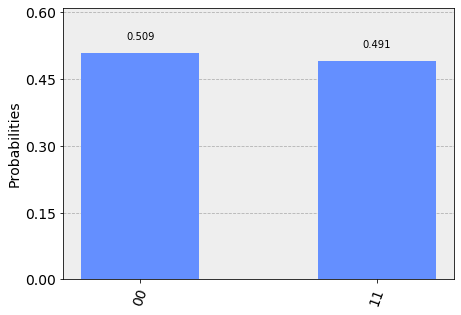

In [2]:
# First, simulate the circuit

##simulator = Aer.get_backend('qasm_simulator')
simulator = backend_tools.get_device(use_sim=True, min_qubits=5)
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

my_func("in example_1")

## Then, plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)